In [1]:
import os
import pandas as pd
from pathlib import Path
import numpy as np
import anndata
import time
import matplotlib.pyplot as plt

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [2]:
download_base = Path('C:/programming_data/abc_download_root')
abc_cache = AbcProjectCache.from_s3_cache(download_base)
abc_cache.current_manifest

'releases/20240330/manifest.json'

In [3]:
exp = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850',
    file_name='example_genes_all_cells_expression',
    dtype={"cell_label": str}
)
exp.set_index('cell_label', inplace=True)

example_genes_all_cells_expression.csv: 100%|██████████████████████████████████████| 360M/360M [01:17<00:00, 4.66MMB/s]


In [6]:
abc_cache.list_data_files('MERFISH-C57BL6J-638850')
path = abc_cache.get_data_path(directory='MERFISH-C57BL6J-638850', file_name='C57BL6J-638850/log2')

In [10]:
adata = anndata.read_h5ad(path, backed='r')
filtered = adata.var[:10]
filtered

,gene_symbol,transcript_identifier
gene_identifier,,
ENSMUSG00000026778,Prkcq,ENSMUST00000028118
ENSMUSG00000026837,Col5a1,ENSMUST00000028280
ENSMUSG00000001985,Grik3,ENSMUST00000030676
ENSMUSG00000039323,Igfbp2,ENSMUST00000047328
ENSMUSG00000048387,Osr1,ENSMUST00000057021
ENSMUSG00000027849,Syt6,ENSMUST00000090697
ENSMUSG00000033063,Cntnap3,ENSMUST00000091554
ENSMUSG00000030226,Lmo3,ENSMUST00000162772
ENSMUSG00000020902,Ntn1,ENSMUST00000021284


In [19]:
cell = abc_cache.get_metadata_dataframe(
    directory = 'MERFISH-C57BL6J-638850',
    file_name = 'cell_metadata',
    dtype = {'cell_label': str}
)
cell.set_index('cell_label', inplace = True)

def _create_expression_dataframe(ad, gf, cf):
    gdata = ad[:, gf.index].to_df()
    gdata.columns = gf.gene_symbol
    joined = cf.join(gdata)
    return joined

# Generate gene_filtered
gene_filtered = adata.var.iloc[:10, :]     # Gene range change
asubset = adata[:, gene_filtered.index].to_memory()

# Gene expression data per cell
ntexp = _create_expression_dataframe(asubset, gene_filtered, cell)

In [20]:
print(ntexp)

                      brain_section_label  cluster_alias  \
cell_label                                                 
1019171907102340387-1   C57BL6J-638850.37           1408   
1104095349101460194-1   C57BL6J-638850.26           4218   
1017092617101450577     C57BL6J-638850.25           4218   
1018093344101130233     C57BL6J-638850.13           4218   
1019171912201610094     C57BL6J-638850.27           4218   
...                                   ...            ...   
1018093344100380167-3   C57BL6J-638850.47           5252   
1017165415100930567     C57BL6J-638850.57           5254   
1017155956102610748     C57BL6J-638850.49           5254   
1017155956101980080-1   C57BL6J-638850.50           5252   
1018093344102220578-3   C57BL6J-638850.36           5252   

                       average_correlation_score feature_matrix_label  \
cell_label                                                              
1019171907102340387-1                   0.596276       C57BL6J-638850   


In [3]:
# Data overview
# Cell metadata

In [4]:
cell = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850',
    file_name='cell_metadata',
    dtype={"cell_label": str}
)
cell.set_index('cell_label', inplace=True)
print("Number of cells = ", len(cell))
cell.head(5)

Number of cells =  3938808


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z
cell_label,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4


In [5]:
def print_column_info(df):
    
    for c in df.columns:
        grouped = df[[c]].groupby(c).count()
        members = ''
        if len(grouped) < 30:
            members = str(list(grouped.index))
        print("Number of unique %s = %d %s" % (c,len(grouped), members))

In [6]:
print_column_info(cell)

Number of unique brain_section_label = 59 
Number of unique cluster_alias = 5320 
Number of unique average_correlation_score = 3932069 
Number of unique feature_matrix_label = 1 ['C57BL6J-638850']
Number of unique donor_label = 1 ['C57BL6J-638850']
Number of unique donor_genotype = 1 ['wt/wt']
Number of unique donor_sex = 1 ['M']
Number of unique x = 3938808 
Number of unique y = 3938808 
Number of unique z = 59 


In [7]:
cluster_details = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership_pivoted',
    keep_default_na=False
)
cluster_details.set_index('cluster_alias', inplace=True)
cluster_details.head(5)

,neurotransmitter,class,subclass,supertype,cluster
cluster_alias,,,,,
1,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0326 L2 IT PPP-APr Glut_3
2,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0082 L2 IT PPP-APr Glut_3,0327 L2 IT PPP-APr Glut_3
3,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0322 L2 IT PPP-APr Glut_2
4,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0323 L2 IT PPP-APr Glut_2
5,Glut,01 IT-ET Glut,018 L2 IT PPP-APr Glut,0081 L2 IT PPP-APr Glut_2,0325 L2 IT PPP-APr Glut_2


In [9]:
abc_cache.list_data_files('MERFISH-C57BL6J-638850-sections')

['C57BL6J-638850.01/log2',
 'C57BL6J-638850.01/raw',
 'C57BL6J-638850.02/log2',
 'C57BL6J-638850.02/raw',
 'C57BL6J-638850.03/log2',
 'C57BL6J-638850.03/raw',
 'C57BL6J-638850.04/log2',
 'C57BL6J-638850.04/raw',
 'C57BL6J-638850.05/log2',
 'C57BL6J-638850.05/raw',
 'C57BL6J-638850.06/log2',
 'C57BL6J-638850.06/raw',
 'C57BL6J-638850.08/log2',
 'C57BL6J-638850.08/raw',
 'C57BL6J-638850.09/log2',
 'C57BL6J-638850.09/raw',
 'C57BL6J-638850.10/log2',
 'C57BL6J-638850.10/raw',
 'C57BL6J-638850.11/log2',
 'C57BL6J-638850.11/raw',
 'C57BL6J-638850.12/log2',
 'C57BL6J-638850.12/raw',
 'C57BL6J-638850.13/log2',
 'C57BL6J-638850.13/raw',
 'C57BL6J-638850.14/log2',
 'C57BL6J-638850.14/raw',
 'C57BL6J-638850.15/log2',
 'C57BL6J-638850.15/raw',
 'C57BL6J-638850.16/log2',
 'C57BL6J-638850.16/raw',
 'C57BL6J-638850.17/log2',
 'C57BL6J-638850.17/raw',
 'C57BL6J-638850.18/log2',
 'C57BL6J-638850.18/raw',
 'C57BL6J-638850.19/log2',
 'C57BL6J-638850.19/raw',
 'C57BL6J-638850.24/log2',
 'C57BL6J-638850.24

In [12]:
abc_cache.list_metadata_files('MERFISH-C57BL6J-638850')

['cell_metadata',
 'cell_metadata_with_cluster_annotation',
 'example_genes_all_cells_expression',
 'gene']

In [3]:
# 여기부터
cell = abc_cache.get_metadata_dataframe(directory='MERFISH-C57BL6J-638850', file_name='cell_metadata_with_cluster_annotation')
cell.set_index('cell_label', inplace=True)

In [4]:
cell

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,0.596276,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.226245,4.148963,6.6,NaN,04 DG-IMN Glut,038 DG-PIR Ex IMN,0141 DG-PIR Ex IMN_2,0515 DG-PIR Ex IMN_2,#666666,#16f2f2,#3D53CC,#CC7A3D,#73FFBF
1104095349101460194-1,C57BL6J-638850.26,4218,0.641180,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.064889,7.309543,4.2,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1017092617101450577,C57BL6J-638850.25,4218,0.763531,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.792921,8.189973,4.0,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1018093344101130233,C57BL6J-638850.13,4218,0.558073,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.195950,5.868655,2.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
1019171912201610094,C57BL6J-638850.27,4218,0.591009,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.635732,7.995842,4.4,Glut,23 P Glut,235 PG-TRN-LRN Fat2 Glut,0953 PG-TRN-LRN Fat2 Glut_1,4199 PG-TRN-LRN Fat2 Glut_1,#2B93DF,#6b5ca5,#9B7ACC,#990041,#663D63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,0.574988,C57BL6J-638850,C57BL6J-638850,wt/wt,M,1.560003,4.669243,8.8,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5309 Endo NN_1,#666666,#858881,#994567,#00992A,#5C9994
1017165415100930567,C57BL6J-638850.57,5254,0.620546,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.032556,3.695696,11.0,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473
1017155956102610748,C57BL6J-638850.49,5254,0.548053,C57BL6J-638850,C57BL6J-638850,wt/wt,M,2.549142,4.231188,9.2,NaN,33 Vascular,333 Endo NN,1193 Endo NN_1,5310 Endo NN_1,#666666,#858881,#994567,#00992A,#FFB473


In [5]:
cell_extract = cell.loc[:, ['brain_section_label',
                                'cluster_alias']]

In [6]:
# CCF coordinates
coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='ccf_coordinates',
    dtype={"cell_label": str}
)
coords.set_index('cell_label', inplace=True)
cell_joined = cell_extract.join(coords, how='inner')

# Parcellation annotation
parcellation_annotation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                           file_name='parcellation_to_parcellation_term_membership_acronym')
parcellation_annotation.set_index('parcellation_index', inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
parcellation_annotation = parcellation_annotation.loc[:, ['parcellation_substructure']]         # TODO: need 'parcellation_division',' parcellation_structure'?
cell_joined = cell_joined.join(parcellation_annotation, on='parcellation_index')

global cell_matrix
cell_matrix = cell_joined
cell_matrix

,brain_section_label,cluster_alias,x,y,z,parcellation_index,parcellation_substructure
cell_label,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,7.495417,2.445872,7.455066,1160,DG-po
1104095349101460194-1,C57BL6J-638850.26,4218,9.227966,6.133693,5.225024,564,TRN
1017092617101450577,C57BL6J-638850.25,4218,9.344912,6.989939,6.002664,761,P-unassigned
1018093344101130233,C57BL6J-638850.13,4218,10.977068,4.398568,3.305223,718,arb
1019171912201610094,C57BL6J-638850.27,4218,8.997138,6.798329,5.827197,761,P-unassigned
...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,5.321669,2.575568,1.694437,828,SSp-n2/3
1017165415100930567,C57BL6J-638850.57,5254,3.493405,2.016746,5.317544,1004,ACAd5
1017155956102610748,C57BL6J-638850.49,5254,4.994629,2.542668,2.773582,1091,SSp-m6a


In [7]:
struct_names = ['LH']
pred = (cell_matrix['parcellation_substructure'].isin(struct_names))

# Use copy() to avoid SettingWithCopyWarning error
global filtered_matrix
filtered_matrix = cell_matrix[pred].copy()

In [44]:
gene = abc_cache.get_metadata_dataframe(
        directory = 'MERFISH-C57BL6J-638850',
        file_name = 'gene'
)
gene.set_index('gene_identifier', inplace=True)

file = abc_cache.get_data_path(
    directory = 'MERFISH-C57BL6J-638850',
    file_name = 'C57BL6J-638850/log2'
)
adata = anndata.read_h5ad(file, backed='r')

In [45]:
asubset = adata[filtered_matrix.index, :].to_memory()

In [46]:
mer_subset = asubset
mer_subset

AnnData object with n_obs × n_vars = 2592 × 550
    obs: 'brain_section_label'
    var: 'gene_symbol', 'transcript_identifier'
    uns: 'accessed_on', 'src'

In [74]:
file = abc_cache.get_data_path(directory = 'WMB-10Xv3', file_name = 'WMB-10Xv3-TH/log2')
adata = anndata.read_h5ad(file, backed = 'r')

In [75]:
adata

AnnData object with n_obs × n_vars = 130856 × 32285 backed at 'C:\\programming_data\\abc_download_root\\expression_matrices\\WMB-10Xv3\\20230630\\WMB-10Xv3-TH-log2.h5ad'
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
    var: 'gene_symbol'
    uns: 'normalization', 'parent', 'parent_layer', 'parent_rows'

In [76]:
adata_list = [adata, adata]
adata_list

[AnnData object with n_obs × n_vars = 130856 × 32285 backed at 'C:\\programming_data\\abc_download_root\\expression_matrices\\WMB-10Xv3\\20230630\\WMB-10Xv3-TH-log2.h5ad'
     obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
     var: 'gene_symbol'
     uns: 'normalization', 'parent', 'parent_layer', 'parent_rows',
 AnnData object with n_obs × n_vars = 130856 × 32285 backed at 'C:\\programming_data\\abc_download_root\\expression_matrices\\WMB-10Xv3\\20230630\\WMB-10Xv3-TH-log2.h5ad'
     obs: 'cell_barcode', 'library_label', 'anatomical_division_label'
     var: 'gene_symbol'
     uns: 'normalization', 'parent', 'parent_layer', 'parent_rows']

In [49]:
common_genes = mer_subset.var_names.intersection(adata.var_names)
adata = adata[:, common_genes]
mer_subset = mer_subset[:, common_genes]

In [50]:
adata_df = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
merdata_df = pd.DataFrame(mer_subset.X.toarray(), index=mer_subset.obs_names, columns=mer_subset.var_names)
adata_df

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
AGAAGTATCATTACGG-290_B01,0.000000,0.0,5.941135,0.0,0.0,0.0,0.0,5.941135,0.0,0.0,...,0.0,0.000000,0.000000,10.562271,5.941135,0.000000,0.0,0.0,0.0,0.0
TTGACCCCAGGCCTGT-290_B01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,6.645414,0.0,0.0,...,0.0,0.000000,5.659754,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
AATGCCATCGCTAATG-290_B01,0.000000,0.0,7.301104,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,5.734322,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
TGCGATAAGTCATGGG-290_B01,5.731367,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,6.717725,6.717725,6.717725,0.000000,0.000000,0.0,0.0,0.0,0.0
CATCCCAAGATCCGAG-294_B05,0.000000,0.0,7.490927,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,7.490927,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAACACAAA-290_B01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,8.208958,0.0,0.0,0.0,0.0
TTTGTTGCAACACACT-581_B01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
TTTGTTGTCACTACTT-621_A02,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [15]:
merdata_df

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
1017092617101800268,0.000000,0.000000,1.224038,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.738118,0.0
1017092617101780513-1,0.000000,0.000000,0.000000,2.185948,0.0,0.000000,0.0,0.0,1.751394,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
1017092617101800358-1,1.088195,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
1019171906102380019,0.815081,0.000000,0.000000,0.000000,0.0,0.815081,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0
1017092617101570581,0.000000,0.000000,0.000000,0.705454,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.705454,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019171907201860166,0.000000,0.662143,0.000000,0.662143,0.0,0.000000,0.0,0.0,1.735404,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.662143,0.0,0.0,0.000000,0.0
1017092617101541261,0.000000,0.000000,0.000000,1.457632,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.00000,0.0,2.641480,0.0,0.0,0.000000,0.0
1019171907101860449-1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.318589,0.0,...,0.0,0.0,0.0,0.00000,0.0,1.318589,0.0,0.0,0.000000,0.0


In [35]:
test_adata = normalize(adata_df, norm='l2')
test_adata = pd.DataFrame(test_adata, index=adata_df.index, columns=adata_df.columns)
test_adata

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
AGAAGTATCATTACGG-290_B01,0.000000,0.0,0.081311,0.0,0.0,0.0,0.0,0.081311,0.0,0.0,...,0.0,0.000000,0.000000,0.144556,0.081311,0.000000,0.0,0.0,0.0,0.0
TTGACCCCAGGCCTGT-290_B01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.091396,0.0,0.0,...,0.0,0.000000,0.077840,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
AATGCCATCGCTAATG-290_B01,0.000000,0.0,0.103236,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.081082,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
TGCGATAAGTCATGGG-290_B01,0.077375,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.090692,0.090692,0.090692,0.000000,0.000000,0.0,0.0,0.0,0.0
CATCCCAAGATCCGAG-294_B05,0.000000,0.0,0.097236,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.097236,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAACACAAA-290_B01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.144331,0.0,0.0,0.0,0.0
TTTGTTGCAACACACT-581_B01,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
TTTGTTGTCACTACTT-621_A02,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [36]:
test_mer = normalize(merdata_df, norm='l2')
test_mer = pd.DataFrame(test_mer, index=merdata_df.index, columns=merdata_df.columns)
test_mer

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
1017092617101800268,0.000000,0.000000,0.100357,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.060517,0.0
1017092617101780513-1,0.000000,0.000000,0.000000,0.113554,0.0,0.000000,0.0,0.0,0.090980,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1017092617101800358-1,0.079296,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1019171906102380019,0.063586,0.000000,0.000000,0.000000,0.0,0.063586,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1017092617101570581,0.000000,0.000000,0.000000,0.051576,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.051576,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019171907201860166,0.000000,0.031067,0.000000,0.031067,0.0,0.000000,0.0,0.0,0.081423,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.031067,0.0,0.0,0.000000,0.0
1017092617101541261,0.000000,0.000000,0.000000,0.071958,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.130399,0.0,0.0,0.000000,0.0
1019171907101860449-1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.083553,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.083553,0.0,0.0,0.000000,0.0


In [26]:
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors

def get_knn(dat, ref_dat, k=15, ref_dat_norm=False, return_distance=True):
    # Normalize data
    if not ref_dat_norm:
        ref_dat = normalize(ref_dat, norm='l2')
    dat = normalize(dat, norm='l2')

    nn = NearestNeighbors(n_neighbors=k, metric='cosine')
    nn.fit(ref_dat)
    distances, indices = nn.kneighbors(dat)
    
    knn_index = indices
    knn_distance = distances

    if return_distance:
        return knn_index, knn_distance
    else:
        return knn_index

knn_index, knn_distance = get_knn(merdata_df, adata_df)
# knn_index, knn_distance = get_knn(merdata_df.iloc[90:100], merdata_df)
print(knn_index)
# print(knn_distance)

[[128368  56928 126256 ... 124434 123171  52660]
 [128368  54639 126668 ... 124486 123880  50918]
 [130655  57768 126256 ... 124642  57855 128097]
 ...
 [127756 123995  53286 ... 124966 123187 129155]
 [128330 127562  58135 ... 125649 129148 129729]
 [128330 124116 128201 ... 126798 127300 124394]]


In [57]:
# cell_label을 사용하여 knn_index를 cluster_alias로 변환
def convert_knn_to_cluster_alias(knn_index, cell_matrix):
    num_queries = knn_index.shape[0]
    k = knn_index.shape[1]
    knn_cluster_alias = np.empty_like(knn_index, dtype=int)
    
    for i in range(num_queries):
        for j in range(k):
            cell_label = cell_matrix.index[knn_index[i, j]]
            knn_cluster_alias[i, j] = cell_matrix.loc[cell_label, 'cluster_alias']
    
    return knn_cluster_alias

# 변환된 knn_index를 cluster_alias로 변환
knn_cluster_alias = convert_knn_to_cluster_alias(knn_index, cell_matrix)

# 결과 출력
print("KNN Cluster Alias:\n", knn_cluster_alias)

KNN Cluster Alias:
 [[ 4218  8955  8956  1408  4218  8956  4218  1408  1371  1408]
 [ 4218  4218  8956  1371  4218  4218 24429  1258  8958  4218]
 [ 1408  8957  8957  4218  4218  4218  1371  4218  4218  4218]
 [ 1408  4218  1408  1258 24426  4218  8957  1408  1408  4218]
 [ 4218  1408  8955  8958  1408  1392  4218  8957  4218  1408]
 [ 4218  4218  4218  4218  1408  4218  4218  1258  4218  1371]
 [ 4218  8954  1408  4218  1408  5231  1408  8956  1408  1408]
 [ 4218  8956  1408  1371  1408  4218  4218  8954  1408  8957]
 [ 4218  4218  1371  1408  1408  1408  1408  8956  8957  4218]
 [ 4218  4218  8954  4218  1258  1371  1371  4218  4218  1258]]


In [57]:
# KNN 가중평균
def cal_weighted_average(indices, distances, adata_df):
    weighted_averages = []
    for i in range(len(indices)):
        cell_indices = indices[i]
        cell_distances = distances[i]

        # weights = cell_distances - np.max(cell_distances) - 0.001
        # weights = -weights / np.max(np.abs(weights))
        # weights = weights / np.sum(weights)
        inverse_distances = 1 / cell_distances
        sum_inverse_distances = np.sum(inverse_distances)
        weights = inverse_distances / sum_inverse_distances

        weighted_avg = np.dot(weights, adata_df.iloc[cell_indices])
        weighted_averages.append(weighted_avg)

    return pd.DataFrame(weighted_averages, index=merdata_df.index, columns=adata_df.columns)

weighted_average_df = cal_weighted_average(knn_index, knn_distance, adata_df)

In [58]:
weighted_average_df # (new distance)

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
1017092617101800268,0.000000,0.0,0.0,0.000000,0.0,0.474200,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1017092617101780513-1,0.000000,0.0,0.0,1.046903,0.0,0.939440,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.466070,0.000000,0.0,0.000000,0.0,0.0
1017092617101800358-1,0.523601,0.0,0.0,0.000000,0.0,0.421095,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1019171906102380019,0.000000,0.0,0.0,0.971940,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.478760,0.000000,0.0,0.000000,0.0,0.0
1017092617101570581,0.000000,0.0,0.0,1.457155,0.0,0.000000,0.0,0.0,0.464067,0.0,...,0.0,0.0,0.0,0.0,0.530029,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019171907201860166,0.415072,0.0,0.0,0.484986,0.0,0.000000,0.0,0.0,5.078324,0.0,...,0.0,0.0,0.0,0.0,0.000000,7.234344,0.0,0.378783,0.0,0.0
1017092617101541261,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.359301,0.0,...,0.0,0.0,0.0,0.0,0.000000,9.109044,0.0,0.000000,0.0,0.0
1019171907101860449-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,2.749653,0.0,...,0.0,0.0,0.0,0.0,0.000000,9.028041,0.0,0.000000,0.0,0.0


In [33]:
weighted_average_df # (old distance)

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
1017092617101800268,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1017092617101780513-1,0.0,0.0,0.0,4.004083,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1017092617101800358-1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1019171906102380019,0.0,0.0,0.0,0.148624,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1017092617101570581,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,3.197185,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019171907201860166,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,7.371892,0.0,...,0.0,0.0,0.0,0.0,0.000000,7.278092,0.0,0.0,0.0,0.0
1017092617101541261,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,9.576397,0.0,0.0,0.0,0.0
1019171907101860449-1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.839094,0.0,...,0.0,0.0,0.0,0.0,0.000000,9.501589,0.0,0.0,0.0,0.0


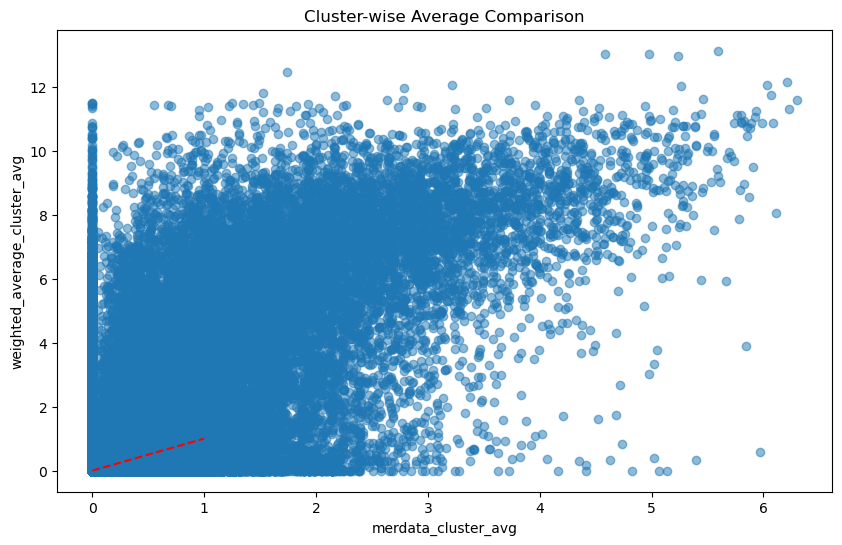

In [61]:
import pandas as pd

# 예시 데이터프레임 생성 (실제 데이터프레임을 여기에 사용하세요)
# mer_metadata, merdata_df, weighted_average_df가 이미 정의되어 있다고 가정합니다.

# 'cluster_alias'를 기준으로 그룹화하여 평균 계산
merdata_cluster_avg = merdata_df.groupby(filtered_matrix['cluster_alias']).mean()
weighted_average_cluster_avg = weighted_average_df.groupby(filtered_matrix['cluster_alias']).mean()

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(merdata_cluster_avg.values.flatten(), weighted_average_cluster_avg.values.flatten(), alpha=0.5)
plt.xlabel('merdata_cluster_avg')
plt.ylabel('weighted_average_cluster_avg')
plt.title('Cluster-wise Average Comparison')
plt.plot([0, 1], [0, 1], 'r--')  # 대각선 기준선 추가
plt.show()

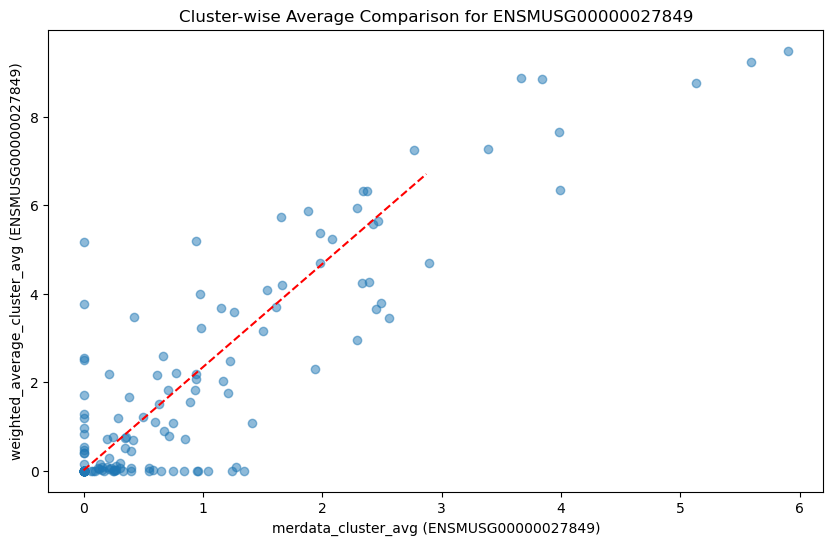

In [73]:
# 특정 유전자 인덱스 선택 (예: 0번 유전자)
gene_index = 5  # 여기에 특정 유전자 인덱스를 입력하세요
# 유전자 이름을 인덱스를 통해 얻음
gene_name = merdata_df.columns[gene_index]

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(merdata_cluster_avg.iloc[:, gene_index], weighted_average_cluster_avg.iloc[:, gene_index], alpha=0.5)
plt.xlabel(f'merdata_cluster_avg ({gene_name})')
plt.ylabel(f'weighted_average_cluster_avg ({gene_name})')
plt.title(f'Cluster-wise Average Comparison for {gene_name}')
plt.plot([merdata_cluster_avg.min().mean(), merdata_cluster_avg.max().mean()], [weighted_average_cluster_avg.min().mean(), weighted_average_cluster_avg.max().mean()], 'r--')  # 대각선 기준선 추가
plt.show()

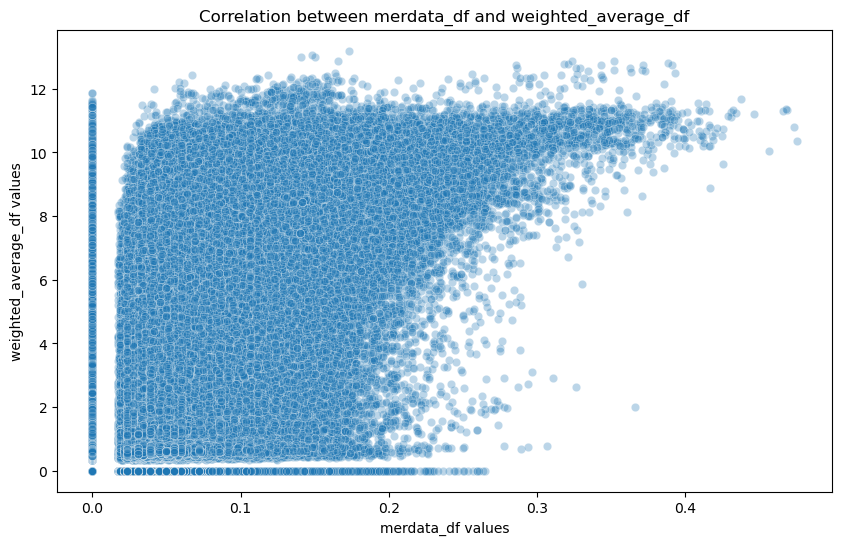

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 예제 데이터프레임 (실제 데이터프레임을 사용해야 함)
# merdata_df = pd.read_csv('path_to_merdata_df.csv')  # 예를 들어 데이터프레임을 파일에서 읽어오는 경우
# weighted_average_df = pd.read_csv('path_to_weighted_average_df.csv')  # 예를 들어 데이터프레임을 파일에서 읽어오는 경우

# 데이터프레임을 1차원 배열로 변환
merdata_values = test.values.flatten()
weighted_average_values = weighted_average_df.values.flatten()
# weighted_average_values = test.values.flatten()

# 산점도 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merdata_values, y=weighted_average_values, alpha=0.3)
plt.xlabel('merdata_df values')
plt.ylabel('weighted_average_df values')
plt.title('Correlation between merdata_df and weighted_average_df')
plt.show()

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

# 예를 들어, merdata_df와 test 데이터프레임이 있다고 가정합니다.
# merdata_df와 test는 NumPy 배열로 변환
data_before = test_mer.values
data_after = weighted_average_df.values

# 정규화 전후의 데이터가 모두 정규화된 상태로 코사인 유사도 계산
# 정규화된 상태에서 벡터 간의 방향성 비교
cos_sim = cosine_similarity(data_before, data_after)

# 같은 셀끼리 비교하기 위해, 대각선 요소만 추출
diagonal_cos_sim = np.diag(cos_sim)

# 평균 코사인 유사도 계산
mean_cos_sim = np.mean(diagonal_cos_sim)

print(f"Mean Cosine Similarity (same cell): {mean_cos_sim}")

Mean Cosine Similarity (same cell): 0.7527761153131293


In [40]:
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize

# 데이터프레임을 정규화하는 함수
def normalize_df(df):
    # 정규화를 위해 값만 추출
    values = df.values
    # L2 정규화를 적용
    normalized_values = normalize(values, norm='l2', axis=1)
    # 정규화된 값을 원래의 데이터프레임 형식으로 변환
    normalized_df = pd.DataFrame(normalized_values, index=df.index, columns=df.columns)
    return normalized_df

# merdata_df와 weighted_mean_df를 정규화
normalized_merdata_df = normalize_df(merdata_df)
normalized_weighted_average_df = normalize_df(weighted_average_df)

# R^2 계산
def calculate_r2(true_df, pred_df):
    # 두 데이터프레임을 일렬로 펼침
    true_values = true_df.values.flatten()
    pred_values = pred_df.values.flatten()
    # 결정계수를 계산
    r2 = r2_score(true_values, pred_values)
    return r2

# 결정계수를 계산
r2 = calculate_r2(test_mer, normalized_weighted_average_df)

print(f'R^2 (결정계수): {r2:.4f}')

R^2 (결정계수): 0.3880


Average R^2 (결정계수): -0.1796


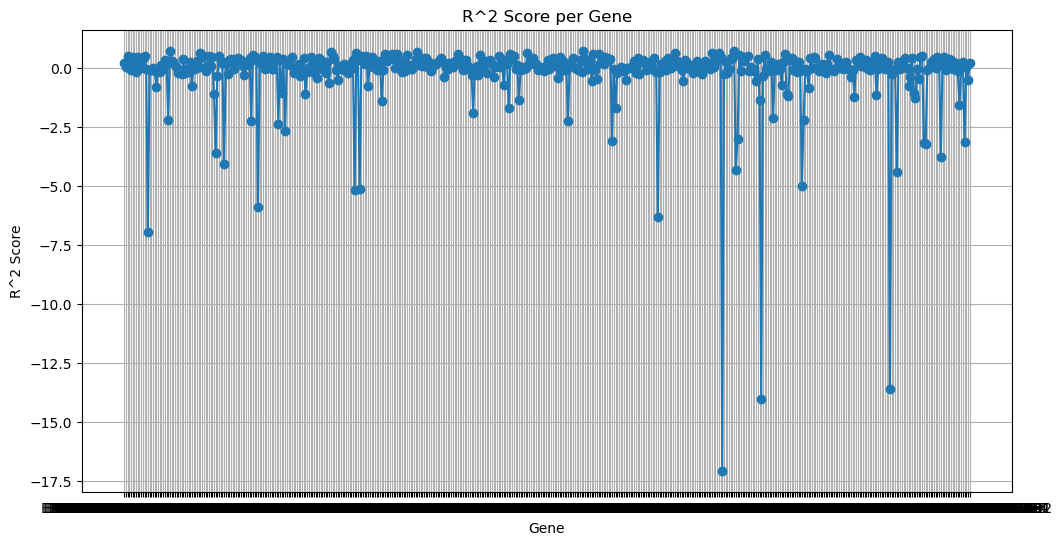

In [56]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 데이터 정규화 (normalize는 0벡터를 고려하지 않음)
adata_scaled = normalize(adata_df, norm='l2', axis=1)
merdata_scaled = normalize(merdata_df, norm='l2', axis=1)

# KNeighborsRegressor 모델 생성 및 학습
knn = KNeighborsRegressor(n_neighbors=15, weights='distance', metric='cosine')
knn.fit(adata_scaled, adata_scaled)

# 예측 수행
merdata_pred = knn.predict(merdata_scaled)

# 데이터프레임 형태로 변환
merdata_pred_df = pd.DataFrame(merdata_pred, index=merdata_df.index, columns=merdata_df.columns)
merdata_scaled_df = pd.DataFrame(merdata_scaled, index=merdata_df.index, columns=merdata_df.columns)

# 결정계수 계산
r2_scores = []
for gene in merdata_df.columns:
    r2 = r2_score(merdata_scaled_df[gene], merdata_pred_df[gene])
    r2_scores.append(r2)

# 평균 R^2 계산
average_r2 = np.mean(r2_scores)

print(f'Average R^2 (결정계수): {average_r2:.4f}')

# 유전자 별 R^2 시각화 (선택사항)
plt.figure(figsize=(12, 6))
plt.plot(merdata_scaled_df.columns, r2_scores, marker='o')
plt.xlabel('Gene')
plt.ylabel('R^2 Score')
plt.title('R^2 Score per Gene')
plt.grid(True)
plt.show()


In [55]:
merdata_pred_df

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
1017092617101800268,0.000000,0.0,0.0,0.000000,0.0,0.010557,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1017092617101780513-1,0.000000,0.0,0.0,0.020345,0.0,0.021069,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.009873,0.000000,0.0,0.000000,0.0,0.0
1017092617101800358-1,0.009994,0.0,0.0,0.000000,0.0,0.008037,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
1019171906102380019,0.000000,0.0,0.0,0.018890,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.010142,0.000000,0.0,0.000000,0.0,0.0
1017092617101570581,0.000000,0.0,0.0,0.028176,0.0,0.000000,0.0,0.0,0.009172,0.0,...,0.0,0.0,0.0,0.0,0.011228,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019171907201860166,0.006782,0.0,0.0,0.007248,0.0,0.000000,0.0,0.0,0.082019,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.115484,0.0,0.006365,0.0,0.0
1017092617101541261,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.005449,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.155562,0.0,0.000000,0.0,0.0
1019171907101860449-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.048013,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.155739,0.0,0.000000,0.0,0.0


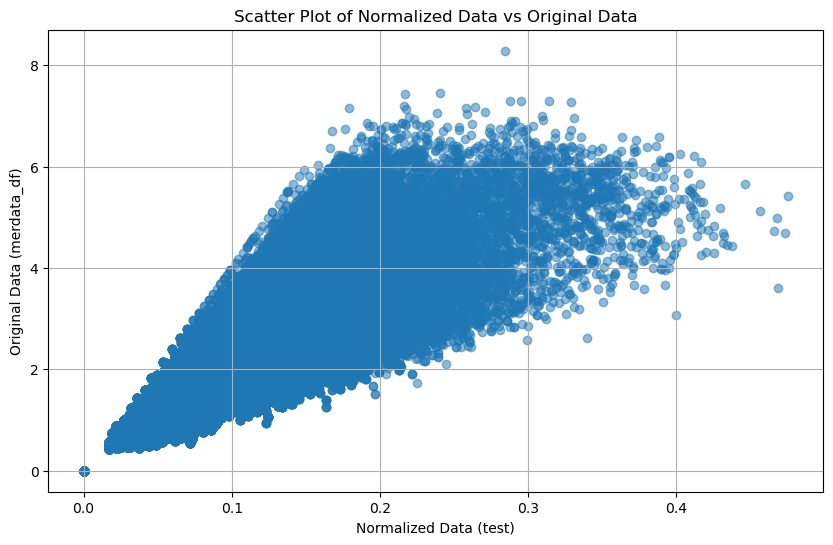

In [50]:
# X축: test, Y축: merdata_df
plt.figure(figsize=(10, 6))
plt.scatter(test.values.flatten(), merdata_df.values.flatten(), alpha=0.5)
plt.xlabel('Normalized Data (test)')
plt.ylabel('Original Data (merdata_df)')
plt.title('Scatter Plot of Normalized Data vs Original Data')
plt.grid(True)
plt.show()

In [35]:
adata_half = adata_df.iloc[50000:]

In [37]:
knn_hindex, knn_hdistance = get_knn(merdata_df, adata_half)

In [38]:
print(knn_hindex)
print(knn_hdistance)

[[80751 80805 80754 ... 80757 80699 80733]
 [80711 80754 80731 ... 80760 80736 15315]
 [80754 80775 80731 ... 80742 80816 80808]
 ...
 [18664 18686 81134 ... 81204 81117 18682]
 [18583 18665 18662 ... 18684 18745 18746]
 [18665 18668 18662 ... 18759 18684 18686]]
[[0.42310868 0.48131121 0.48234544 ... 0.53277036 0.53408907 0.53800099]
 [0.45764433 0.46606819 0.47636008 ... 0.55104407 0.55364983 0.5573603 ]
 [0.47713419 0.51749218 0.53158944 ... 0.59303752 0.59820379 0.60047374]
 ...
 [0.37138622 0.37800405 0.38622819 ... 0.4210236  0.42325674 0.42370807]
 [0.42189755 0.42709738 0.45703036 ... 0.49622782 0.49824084 0.49849251]
 [0.42057665 0.43323131 0.43339627 ... 0.50318627 0.50376508 0.50489044]]


In [51]:
def mer_metadata():
    cell = abc_cache.get_metadata_dataframe(directory='MERFISH-C57BL6J-638850', file_name='cell_metadata_with_cluster_annotation')
    cell.set_index('cell_label', inplace=True)

    # Extract your needs from cell metadata
    cell_extract = cell.loc[:, ['brain_section_label',
                                'cluster_alias']]           # TODO: 'average_correlation_score'?

    # CCF coordinates
    coords = abc_cache.get_metadata_dataframe(
        directory='MERFISH-C57BL6J-638850-CCF',
        file_name='ccf_coordinates',
        dtype={"cell_label": str}
    )
    coords.set_index('cell_label', inplace=True)
    cell_joined = cell_extract.join(coords, how='inner')

    # Parcellation annotation
    parcellation_annotation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                               file_name='parcellation_to_parcellation_term_membership_acronym')
    parcellation_annotation.set_index('parcellation_index', inplace=True)
    parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
    parcellation_annotation = parcellation_annotation.loc[:, ['parcellation_substructure']]         # TODO: need 'parcellation_division',' parcellation_structure'?
    cell_joined = cell_joined.join(parcellation_annotation, on='parcellation_index')

    return cell_joined

mer_metadata = mer_metadata()

In [52]:
mer_metadata

,brain_section_label,cluster_alias,x,y,z,parcellation_index,parcellation_substructure
cell_label,,,,,,,
1019171907102340387-1,C57BL6J-638850.37,1408,7.495417,2.445872,7.455066,1160,DG-po
1104095349101460194-1,C57BL6J-638850.26,4218,9.227966,6.133693,5.225024,564,TRN
1017092617101450577,C57BL6J-638850.25,4218,9.344912,6.989939,6.002664,761,P-unassigned
1018093344101130233,C57BL6J-638850.13,4218,10.977068,4.398568,3.305223,718,arb
1019171912201610094,C57BL6J-638850.27,4218,8.997138,6.798329,5.827197,761,P-unassigned
...,...,...,...,...,...,...,...
1018093344100380167-3,C57BL6J-638850.47,5252,5.321669,2.575568,1.694437,828,SSp-n2/3
1017165415100930567,C57BL6J-638850.57,5254,3.493405,2.016746,5.317544,1004,ACAd5
1017155956102610748,C57BL6J-638850.49,5254,4.994629,2.542668,2.773582,1091,SSp-m6a


In [59]:
condition = (mer_metadata['parcellation_substructure'] == 'LH') & (mer_metadata['cluster_alias'] == 14956)

# 조건을 만족하는 행의 인덱스 가져오기
filtered_index = mer_metadata[condition].index

# 인덱스 출력
print("Filtered cell labels:", filtered_index.tolist())

Filtered cell labels: ['1017092617101780151-1', '1019171907102040525-2', '1019171907102040144-1', '1019171907101860145-1', '1017092617101541207', '1019171907202040332', '1019171907102040199-2', '1019171907102040393-2', '1017092617101790170', '1019171907102040345-2', '1019171907102090608', '1019171907102310104-1', '1019171907102040029-1', '1104095349101960276-2', '1017092617101800136-1', '1019171907101690366-1', '1017092617101770126-1', '1019171907102090589', '1019171907102040340-2', '1017092617101800130-1', '1019171907102040364-1', '1019171907101680755', '1017092617101780292-1', '1019171907101860157', '1019171907101860172-1', '1017092617101780591', '1017092617101780392', '1017092617101770095-1', '1019171906101990227', '1104095349101961025', '1019171907101680508', '1019171907101860357-1', '1019171907201680249', '1019171907102090811', '1019171907102040460-1', '1017092617101800157-1', '1017092617101800205', '1017092617101800240', '1019171907101860532-1', '1019171907101690066-1', '10170926

In [60]:
filtered_df = merdata_df.loc[filtered_index]
filtered_df

gene_identifier,ENSMUSG00000026778,ENSMUSG00000026837,ENSMUSG00000001985,ENSMUSG00000039323,ENSMUSG00000048387,ENSMUSG00000027849,ENSMUSG00000033063,ENSMUSG00000030226,ENSMUSG00000020902,ENSMUSG00000021685,...,ENSMUSG00000037025,ENSMUSG00000031344,ENSMUSG00000086308,ENSMUSG00000045875,ENSMUSG00000045991,ENSMUSG00000029086,ENSMUSG00000115424,ENSMUSG00000000214,ENSMUSG00000042501,ENSMUSG00000031492
cell_label,,,,,,,,,,,,,,,,,,,,,
1017092617101780151-1,0.000000,0.000000,0.000000,0.839801,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1019171907102040525-2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1019171907102040144-1,0.000000,0.000000,0.000000,1.790076,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,1.156504,0.000000,0.000000,0.0,0.0,0.0
1019171907101860145-1,0.000000,0.000000,0.842458,0.000000,0.000000,0.000000,0.000000,0.000000,0.842458,0.0,...,0.0,0.000000,0.0,0.842458,0.000000,0.000000,0.000000,0.0,0.0,0.0
1017092617101541207,0.743971,0.000000,1.232389,0.000000,0.000000,0.743971,0.743971,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743971,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017092617101800352-1,1.106191,0.000000,1.106191,0.000000,0.000000,0.000000,0.000000,0.000000,2.156493,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1017092617101780436-1,0.000000,0.000000,2.094558,2.094558,0.000000,1.063722,1.063722,0.000000,1.063722,0.0,...,0.0,0.000000,0.0,1.063722,0.000000,1.669315,0.000000,0.0,0.0,0.0
1017092617101780450-1,0.000000,0.862009,1.397877,0.000000,0.862009,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,1.397877,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [61]:
knn_index, knn_distance = get_knn(filtered_df, adata_df)
print(knn_index)
print(knn_distance)

[[117896 122391 120159 ... 116663 114936 118137]
 [114214 115117 121950 ... 121713 114048 118590]
 [114609 119585 122073 ... 117041 121978 116781]
 ...
 [117942 116131 118545 ... 120046 115306 119773]
 [115536 118140 114880 ... 122554  52959 115740]
 [113932 122391 116102 ... 116861 119190 117877]]
[[0.28989996 0.29139036 0.29251564 ... 0.30991494 0.30992363 0.31014461]
 [0.30348144 0.30636186 0.32055351 ... 0.32574424 0.32596169 0.32645363]
 [0.39152471 0.39513435 0.40596212 ... 0.41835694 0.41879769 0.41890299]
 ...
 [0.25759363 0.26040086 0.26091882 ... 0.26915962 0.26961481 0.26977546]
 [0.27030756 0.27631873 0.27653617 ... 0.28111796 0.28253092 0.28306325]
 [0.30991278 0.31530968 0.32571268 ... 0.34630359 0.34672059 0.34700786]]


In [1]:
knn_distance

NameError: name 'knn_distance' is not defined